In [25]:
from power_graph.core.groups import DihedralGroup, SymmetricGroup
from power_graph.core.graphs import EngelGraph
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
S3 = SymmetricGroup(3)
S4 = SymmetricGroup(4)
S5 = SymmetricGroup(5)

In [21]:
S3.print_elements(one_indexed = True)

1: ()
2: (1 2 3)
3: (1 3 2)
4: (1 2)
5: (1 3)
6: (2 3)


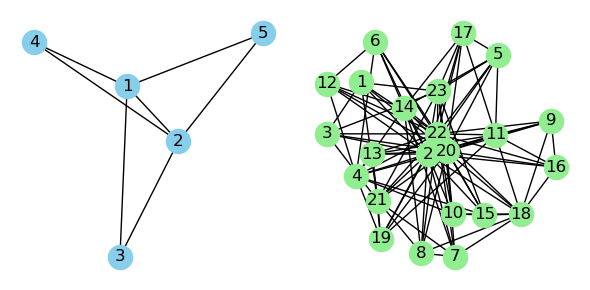

In [7]:
S4 = SymmetricGroup(4)
G_S4 = EngelGraph(S4)
G_S3 = EngelGraph(S3)
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

G_S3.draw(
    ax=axes[0],
    title="",
    node_color="skyblue",
    node_size=300, with_legend = False
)

G_S4.draw(
    ax=axes[1],
    title="",
    node_color="lightgreen",
    node_size=300, with_legend = False
)

plt.tight_layout()
plt.show()

In [10]:
D5 = DihedralGroup(5)
D5.print_elements(one_indexed = True)

1: e
2: r
3: r^2
4: r^3
5: r^4
6: s
7: s·r^1
8: s·r^2
9: s·r^3
10: s·r^4


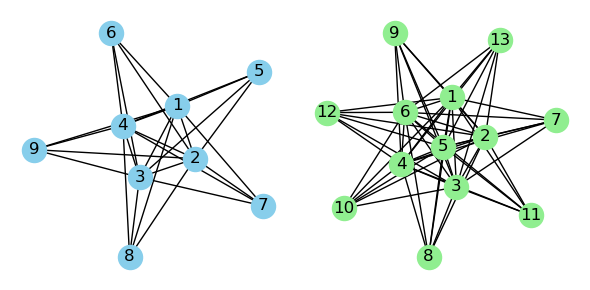

In [11]:
D7 =  DihedralGroup(7)
G_D5 = EngelGraph(D5)
G_D7 = EngelGraph(D7)
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

G_D5.draw(
    ax=axes[0],
    title="",
    node_color="skyblue",
    node_size=300, with_legend = False
)

G_D7.draw(
    ax=axes[1],
    title="",
    node_color="lightgreen",
    node_size=300, with_legend = False
)

plt.tight_layout()
plt.show()

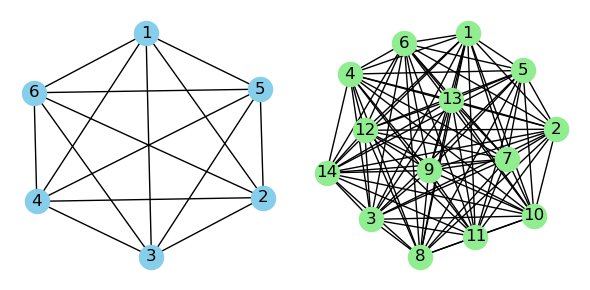

In [13]:
D4 =  DihedralGroup(4)
D8 =  DihedralGroup(8)
G_D4 = EngelGraph(D4)
G_D8 = EngelGraph(D8)
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

G_D4.draw(
    ax=axes[0],
    title="",
    node_color="skyblue",
    node_size=300, with_legend = False
)

G_D8.draw(
    ax=axes[1],
    title="",
    node_color="lightgreen",
    node_size=300, with_legend = False
)

plt.tight_layout()
plt.show()

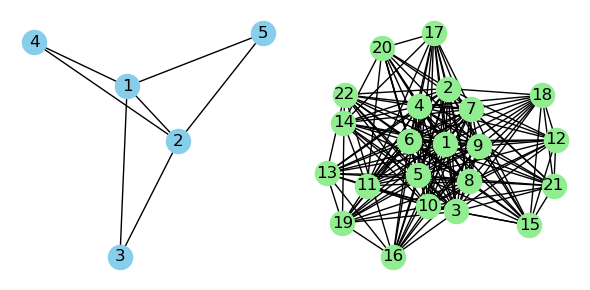

In [15]:
D3 =  DihedralGroup(3)
D12 =  DihedralGroup(12)
G_D3 = EngelGraph(D3)
G_D12 = EngelGraph(D12)
fig, axes = plt.subplots(1, 2, figsize=(6, 3))

G_D3.draw(
    ax=axes[0],
    title="",
    node_color="skyblue",
    node_size=300, with_legend = False
)

G_D12.draw(
    ax=axes[1],
    title="",
    node_color="lightgreen",
    node_size=300, with_legend = False
)

plt.tight_layout()
plt.show()

In [32]:
import pandas as pd

# Definir los grupos a analizar
groups_to_analyze = [
    ("S3", SymmetricGroup(3)),
    ("S4", SymmetricGroup(4)),
    ("S5", SymmetricGroup(5)),
    ("D4", DihedralGroup(4)),
    ("D7", DihedralGroup(7)),
    ("D11", DihedralGroup(11)), 
    ("D20", DihedralGroup(20)),
    ("D77", DihedralGroup(77))
]

summary_data = []

for group_name, group in groups_to_analyze:
    try:
        # Crear grafo de Engel
        engel_graph = EngelGraph(group, verbose=False)
        
        # Obtener resumen usando el método existente
        summary = engel_graph.summarize()
        summary_df = summary["summary"]
        
        summary_data.append({
            "Grupo": group_name,
            "|G|": len(group),
            "|Z∞|": len(group.get_hypercenter()),
            "Vértices": summary_df["Nodos"].iloc[0],
            "Aristas": summary_df["Aristas"].iloc[0],
            "Partes conexas": summary_df["Partes conexas"].iloc[0],
            "Grado máximo": summary_df["Grado máximo"].iloc[0],
            "Grado mínimo": summary_df["Grado mínimo"].iloc[0],
            "Grado promedio": summary_df["Grado promedio"].iloc[0]
        })
        
    except Exception as e:
        print(f"Error con {group_name}: {e}")
        summary_data.append({
            "Grupo": group_name,
            "Orden |G|": len(group),
            "Hipercentro |Z∞|": len(group.get_hypercenter()),
            "Vértices |V|": "Error",
            "Aristas |E|": "Error",
            "Partes conexas": "Error",
            "Grado máximo": "Error", 
            "Grado mínimo": "Error",
            "Grado promedio": "Error"
        })

# Crear DataFrame
df_engel_summary = pd.DataFrame(summary_data)
df_engel_summary

,Grupo,|G|,|Z∞|,Vértices,Aristas,Partes conexas,Grado máximo,Grado mínimo,Grado promedio
0,S3,6,1,5,7,1,4,2,2.80
1,S4,24,1,23,109,1,22,6,9.48
2,S5,120,1,119,1381,1,58,14,23.21
3,D4,8,2,6,15,1,5,5,5.00
4,D7,14,1,13,57,1,12,6,8.77
5,D11,22,1,21,155,1,20,10,14.76
6,D20,40,2,38,543,1,37,21,28.58
7,D77,154,1,153,8702,1,152,76,113.75


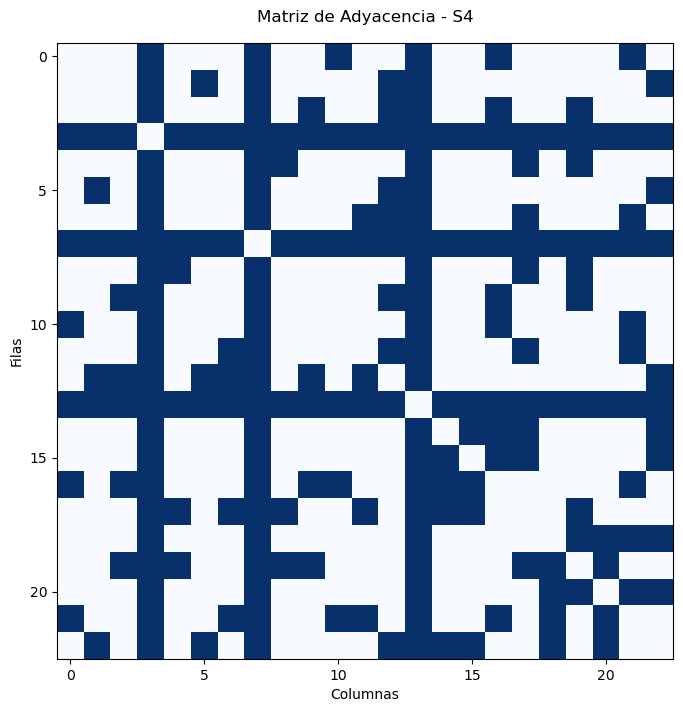

In [22]:
G = SymmetricGroup(4)
graph = EngelGraph(G)

# Obtener matriz de adyacencia
adjacency = graph.summarize()["adjacency_matrix"]

# Mostrar la matriz con imshow
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(adjacency, cmap="Blues", interpolation="none")
ax.set_title("Matriz de Adyacencia - S4", fontsize=12, pad=15)
ax.set_xlabel("Columnas", fontsize=10)
ax.set_ylabel("Filas", fontsize=10)
plt.show()

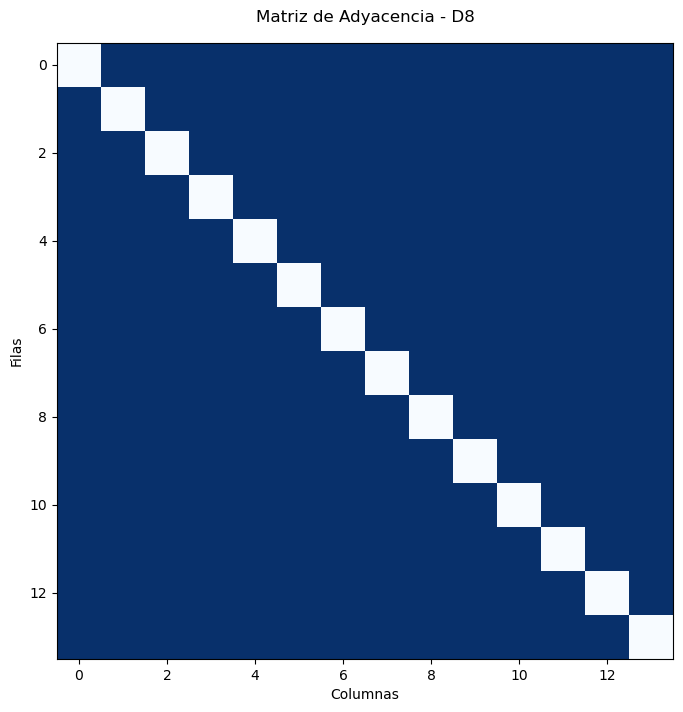

In [23]:
G = DihedralGroup(8)
graph = EngelGraph(G)

# Obtener matriz de adyacencia
adjacency = graph.summarize()["adjacency_matrix"]

# Mostrar la matriz con imshow
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(adjacency, cmap="Blues", interpolation="none")
ax.set_title("Matriz de Adyacencia - D8", fontsize=12, pad=15)
ax.set_xlabel("Columnas", fontsize=10)
ax.set_ylabel("Filas", fontsize=10)
plt.show()